In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
root = 'first-scan/data/parsed/'

b_scans = []
for file in sorted(os.listdir(root)):
    if '.npy' not in file:
        continue
    b_scan = np.loadtxt(root + file, comments='%', delimiter=',').transpose()
    b_scans.append(b_scan)

In [3]:
def join_as_complex(array):
    rows = []
    rows.append(array[0])
    for i in range(3, len(array)):
        if i % 2 == 0:
            continue
        complex_number = array[i] + 1j*array[i+1]
        rows.append(complex_number)
    return rows

In [4]:
for i in range(len(b_scans)):
    b_scans[i] = join_as_complex(b_scans[i])[:-4]

In [5]:
def average_values(array):
    rows = []
    rows.append(array[0])
    for i in range(1, len(array), 4):
        row = []
        for j in range(len(array[i])):
            avg = (array[i][j] + array[i + 1][j] + array[i + 2][j] + array[i + 3][j]) / 4
            row.append(avg)
        rows.append(row)
    return rows

In [6]:
b_scans = b_scans[:-1]

In [7]:
frequencies = b_scans[0][0]
averages = []
for b_scan in b_scans:
    averages.append(average_values(b_scan)[1:])

delta_t = 0.11764844292285792ns


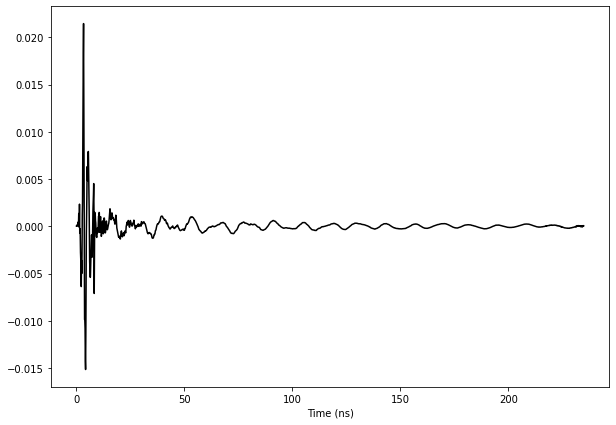

In [8]:
# calculate time step
delta_t = 1 / (frequencies[-1] - frequencies[0])
print('delta_t = ' + str(delta_t*1e9) + 'ns')

# create arrays for plotting
y = np.fft.irfft(averages[7][1])
t = np.arange(0, delta_t * len(y), delta_t)

plt.figure(figsize=(10, 7))
plt.xlabel('Time (ns)')
plt.plot(t*1e9, y, 'black')

plt.show()

delta_t = 0.11764844292285792ns


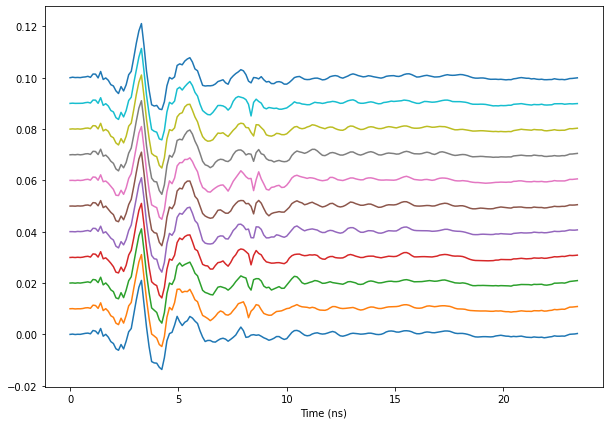

In [14]:
# calculate time step
delta_t = 1 / (frequencies[-1] - frequencies[0])
print('delta_t = ' + str(delta_t*1e9) + 'ns')

plt.figure(figsize=(10, 7))
plt.xlabel('Time (ns)')

for i in range(len(averages[5])):
    # create arrays for plotting
    new_average = np.zeros(200) + averages[7][i][:200]
    new_average = averages[0][i]
    y = np.fft.irfft(new_average)[:200] + i*0.01
    t = np.arange(0, delta_t * len(y), delta_t)

    plt.plot(t*1e9, y)

plt.show()

## B-scan parse

In [274]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [275]:
root = 'first-scan/data2/parsed/'

b_scan = None
for file in sorted(os.listdir(root)):
    if '.npy' not in file:
        continue
    b_scan = np.loadtxt(root + file, comments='%', delimiter=',').transpose()

In [276]:
len(b_scan)

511

In [277]:
def join_as_complex(array):
    rows = []
    rows.append(array[0])
    for i in range(1, len(array)):
        if i % 2 == 0:
            continue
        complex_number = array[i] + 1j*array[i+1]
        rows.append(complex_number)
    return rows

In [278]:
b_scan = join_as_complex(b_scan)
len(b_scan)

256

In [279]:
def average_values(array):
    rows = []
    for i in range(0, len(array), 5):
        row = []
        for j in range(len(array[i])):
            avg = (array[i][j] + array[i + 1][j] + array[i + 2][j] + array[i + 3][j] + array[i + 4][j]) / 5
            row.append(avg)
        rows.append(row)
    return rows

In [280]:
frequencies = b_scan[0]
b_scan = b_scan[2:] + [b_scan[1]]
len(b_scan)

255

In [281]:
b_scan = average_values(b_scan)
len(b_scan)

51

In [282]:
frequencies = frequencies[200:700]

In [283]:
len(frequencies)

500

delta_t = 0.23553265426840694ns


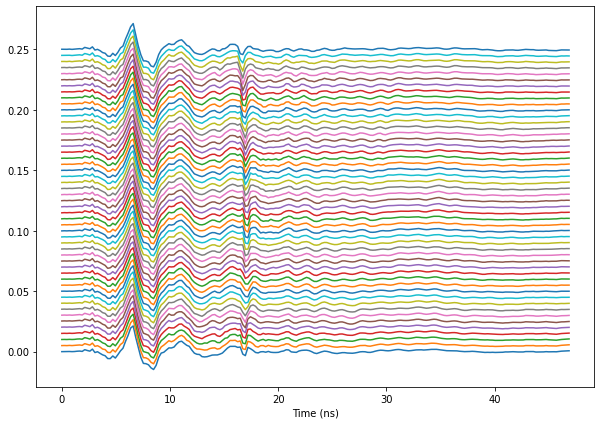

In [284]:
# calculate time step
delta_t = 1 / (frequencies[-1] - frequencies[0])
print('delta_t = ' + str(delta_t*1e9) + 'ns')

plt.figure(figsize=(10, 7))
plt.xlabel('Time (ns)')

for i in range(len(b_scan)):
    # create arrays for plotting
    y = np.fft.irfft(b_scan[i][0:1000])[:200] + i*0.005
    t = np.arange(0, delta_t * len(y), delta_t)

    plt.plot(t*1e9, y)

plt.show()

In [285]:
def draw_image(scan, cmap=None, aspect='auto'):
    rows = []
    for i in range(len(scan)):
        # create arrays for plotting
        rows.append(scan[i])
    plt.imshow(np.array(rows).transpose(), cmap=cmap, aspect='auto')

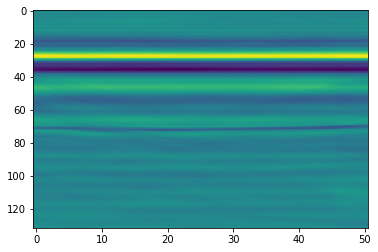

In [347]:
plot = np.apply_along_axis(np.fft.irfft, 1, np.array(b_scan)[:, 0:1000:15])
draw_image(plot)

In [287]:
a = np.array([[1, 2], [3, 4]])

In [288]:
np.apply_along_axis(print, 1, a)

[1 2]
[3 4]


array([None, None], dtype=object)

In [339]:
np.array(b_scan)[:, 0:1000:10].shape

(51, 100)